In [2]:
# Import required modules
import codecs
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np

In [3]:
# Read in html data into a python list using bs4
path_vaac = "../data/vaa/"
fn_vacc = "20200801_28409600_0184_Text.html"
with codecs.open(path_vaac + fn_vacc, 'r') as f:
    html = f.read()
soup = BeautifulSoup(html, features="lxml")
div = soup.find('div')
vaac = [str(s) for s in div.contents if str(s) != '<br/>' and str(s) != str('\n')]
# Print out VAAC info
vaac

[' VAA Text Start ',
 'FVFE01 RJTD 010600',
 'VA ADVISORY',
 'DTG: 20200801/0600Z',
 'VAAC: TOKYO',
 'VOLCANO: NISHINOSHIMA 284096',
 'PSN: N2715 E14052',
 'AREA: JAPAN',
 'SUMMIT ELEV: 25M',
 'ADVISORY NR: 2020/184',
 'INFO SOURCE: HIMAWARI-8',
 'AVIATION COLOUR CODE: NIL',
 'ERUPTION DETAILS: VA EMISSIONS CONTINUING',
 'OBS VA DTG: 01/0520Z',
 'OBS VA CLD: SFC/FL190 N2715 E14053 - N2330 E14230 - N2306 E14346 - ',
 'N2224 E14302 - N2257 E13733 - N2508 E13624 - N2411 E13942 MOV S 10KT',
 'FCST VA CLD +6 HR: 01/1120Z SFC/FL190 N2302 E14154 - N2238 E14318 - ',
 'N2153 E14204 - N2249 E13622 - N2507 E13527 - N2405 E13849 - N2717 ',
 'E14054',
 'FCST VA CLD +12 HR: 01/1720Z SFC/FL190 N2704 E14116 - N2207 E14226 - ',
 'N2121 E14056 - N2254 E13509 - N2519 E13413 - N2353 E13810 - N2717 ',
 'E14056',
 'FCST VA CLD +18 HR: 01/2320Z SFC/FL190 N2624 E14152 - N2144 E14122 - ',
 'N2110 E13918 - N2249 E13422 - N2558 E13248 - N2400 E13736 - N2717 ',
 'E14050',
 'RMK: NIL',
 'NXT ADVISORY: 20200801/120

In [4]:
# Important information is contained in list entries 14 and 15
polygon = vaac[14] + vaac[15]
coords = polygon[22:-11].split('-')
coords

['N2715 E14053 ',
 ' N2330 E14230 ',
 ' N2306 E14346 ',
 ' N2224 E14302 ',
 ' N2257 E13733 ',
 ' N2508 E13624 ',
 ' N2411 E13942']

In [5]:
# Convert VAAC coords to decimals for plotting on a map
lons_polygon = []
lats_polygon = []

for coord in coords:
    lat_str, lon_str = coord.strip().split(' ')
    lat_decimal, lon_decimal = float(lat_str[1:]) / 100., float(lon_str[1:]) / 100.
    lat_split = '{0:.2f}'.format(lat_decimal).split('.')
    lon_split = '{0:.2f}'.format(lon_decimal).split('.')
    lat_float = float(lat_split[0]) + float(lat_split[1]) / 60.
    lon_float = float(lon_split[0]) + float(lon_split[1]) / 60.
    if "E" in lon_str:
        lons_polygon.append(lon_float)
    else:
        lons_polygon.append(-lon_float)
    if "N" in lat_str:
        lats_polygon.append(lat_float)
    else:
        lats_polygon.append(-lat_float)

lons_polygon.append(lons_polygon[0])
lats_polygon.append(lats_polygon[0])
lons_polygon, lats_polygon

([140.88333333333333,
  142.5,
  143.76666666666668,
  143.03333333333333,
  137.55,
  136.4,
  139.7,
  140.88333333333333],
 [27.25,
  23.5,
  23.1,
  22.4,
  22.95,
  25.133333333333333,
  24.183333333333334,
  27.25])

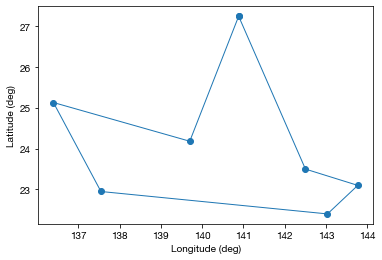

In [6]:
# Plot the polygon
plt.plot(lons_polygon, lats_polygon, 'o-')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()

In [7]:
# Read in satellite data
from satpy import Scene
from datetime import datetime
import glob


path_sat = '../data/himawari8/'
observation_time = datetime(2020, 8, 1, 5)
# Genereate list of filenames for each Himawari band
filelist = glob.glob(path_sat + "*" + observation_time.strftime("%Y%m%d_%H%M") + "*.DAT")
filelist


['../data/himawari8/HS_H08_20200801_0500_B07_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B02_FLDK_R10_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B13_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B06_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B15_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B16_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B01_FLDK_R10_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B11_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B09_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B10_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B04_FLDK_R10_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B08_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B03_FLDK_R05_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B05_FLDK_R20_S0310.DAT',
 '../data/himawari8/HS_H08_20200801_0500_B14_FLDK_R20_S0310.DAT']

In [8]:
scn = Scene(filelist, reader='ahi_hsd')
scn.available_dataset_names()

['B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B13',
 'B14',
 'B15',
 'B16']

In [9]:
scn.load(['true_color', 'B14', 'B15'])

/home/aprata/anaconda3/envs/satpy-env/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


In [10]:
from pyresample import create_area_def

# Set up the area definition for the re-projection.
# Here we the Equidistant Cylindrical (Plate Carrée) projection (https://proj.org/operations/projections/eqc.html)
# area_extent is defined as (lonmin, latmin, lonmax, latmax) with resolution in 0.02 degrees (~2 km)
area_def = create_area_def('eqc', "+proj=eqc", units="degrees",
                           area_extent=(134, 21, 148, 28), resolution=0.02)

lcn = scn.resample(area_def)

/home/aprata/anaconda3/envs/satpy-env/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/aprata/anaconda3/envs/satpy-env/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/aprata/anaconda3/envs/satpy-env/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_st

In [11]:
# Now let's load in the true color composit and bands 14 and 15.
lcn.load(['true_color', 'B14', 'B15'])

/home/aprata/anaconda3/envs/satpy-env/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))


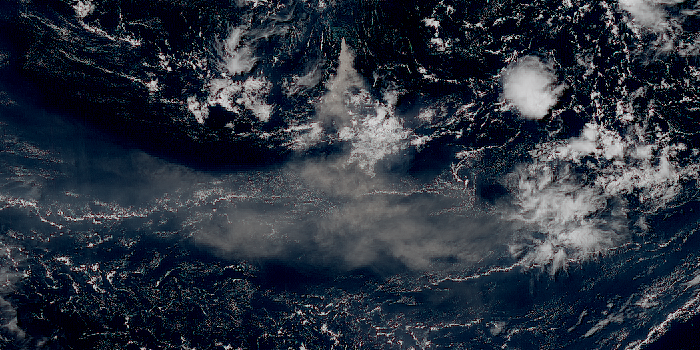

In [12]:
lcn.show('true_color')

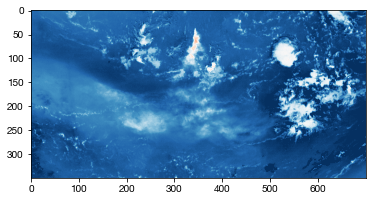

In [13]:
# Plot brightness temperature difference to detect ash (-ve = ash, +ve = water/ice)
T11 = lcn['B14'].values
T12 = lcn['B15'].values
BTD = T11 - T12
plt.imshow(BTD, vmin=-5, vmax=5, cmap='RdBu')

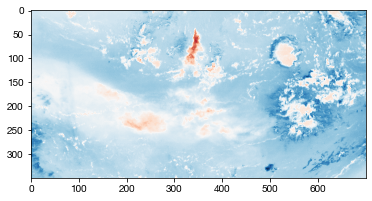

In [14]:
# Notice how the whole plume isn't detected by this difference. This is due to the interference of water vapour.
# To address this we can apply the Yu et al. semi-emprical water vapour correction.
# Note: increasing b reduces the water vapour correction)
b = 4.5
wv = np.exp(6. * (T11 / 320.) - b)
BTD_wv = BTD - wv
plt.imshow(BTD_wv, vmin=-5, vmax=5, cmap='RdBu')

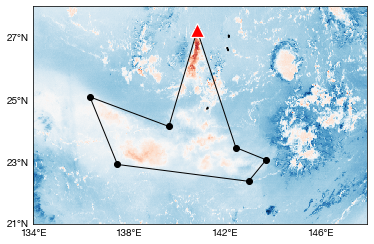

In [15]:
# Next step is to plot Tokyo VAAC polygon and Himawari data on a map using Basemap.
from mpl_toolkits.basemap import Basemap


# Setup figure
fig = plt.figure()
ax = fig.add_subplot(111)


# setup basemap
lw = 1
lon_step = 4
lat_step = 2
line_col = 'k'
extent = [134, 148, 21, 28]
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3],
             epsg=3857, resolution='h', fix_aspect=False, ax=ax)
bm.drawcoastlines(linewidth=lw, color='k')
bm.drawcountries(linewidth=lw, color='k')
bm.drawmeridians(np.arange(extent[0], extent[1] + lon_step, lon_step),
                 labels=[False, False, False, True], textcolor=line_col,
                 color='w', dashes=[1, 3], linewidth=0.1)
bm.drawparallels(np.arange(extent[2], extent[3] + lat_step, lat_step),
                 labels=[True, False, False, False], textcolor=line_col,
                 color='w', dashes=[1, 3], linewidth=0.1)

# Get lons and lats
lons, lats = lcn['B14'].attrs['area'].get_lonlats()

# Convert lons/lats to basemap coordinates
lons_bm, lats_bm = bm(lons, lats)

# Plot data on the map
bm.pcolormesh(lons_bm, lats_bm, BTD_wv, vmin=-5, vmax=5, cmap='RdBu', shading='auto')

# Plot the VAAC polygon on the map
bm.plot(lons_polygon, lats_polygon, 'o-', color='k', latlon=True)

# plot Nishinoshima based on GVP
vlon, vlat = 140.874, 27.247
vsize = 14
bm.plot(vlon, vlat, '^', color='r', ms=vsize, markeredgecolor='w', markeredgewidth=lw + 0.25, zorder=15,
        latlon=True)

plt.show()

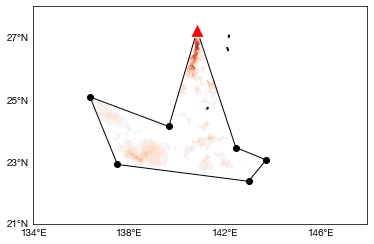

In [29]:
# Mask data outside of VAAC polygon
from matplotlib.path import Path

polygon = [(lon, lat) for lon, lat in zip(lons_polygon, lats_polygon)]
x, y = lons.flatten(), lats.flatten()
points = np.vstack((x,y)).T
p = Path(polygon)
grid = p.contains_points(points)
mask = grid.reshape(lats.shape)
BTD_wv_ma = np.ma.array(BTD_wv, mask=mask==False)

# Mask BTDs greater than or equal to zero
BTD_wv_ma = np.ma.masked_greater_equal(BTD_wv_ma, 0)

# Setup figure
fig = plt.figure()
ax = fig.add_subplot(111)

# setup basemap
lw = 1
lon_step = 4
lat_step = 2
line_col = 'k'
extent = [134, 148, 21, 28]
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3],
             epsg=3857, resolution='h', fix_aspect=False, ax=ax)
bm.drawcoastlines(linewidth=lw, color='k')
bm.drawcountries(linewidth=lw, color='k')
bm.drawmeridians(np.arange(extent[0], extent[1] + lon_step, lon_step),
                 labels=[False, False, False, True], textcolor=line_col,
                 color='w', dashes=[1, 3], linewidth=0.1)
bm.drawparallels(np.arange(extent[2], extent[3] + lat_step, lat_step),
                 labels=[True, False, False, False], textcolor=line_col,
                 color='w', dashes=[1, 3], linewidth=0.1)

# Plot data on the map
bm.pcolormesh(lons_bm, lats_bm, BTD_wv_ma, vmin=-5, vmax=5, cmap='RdBu', shading='auto')

# Plot the VAAC polygon on the map
bm.plot(lons_polygon, lats_polygon, 'o-', color='k', latlon=True)

# plot Nishinoshima based on GVP
vlon, vlat = 140.874, 27.247
vsize = 14
bm.plot(vlon, vlat, '^', color='r', ms=vsize, markeredgecolor='w', markeredgewidth=lw + 0.25, zorder=15,
        latlon=True)

plt.show()

(array([  13.,   18.,   41.,   48.,   74.,   83.,   84.,   90.,  106.,
         181.,  351.,  578., 1246., 3143., 4746., 6055.]),
 array([-4.  , -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
        -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ]),
 <BarContainer object of 16 artists>)

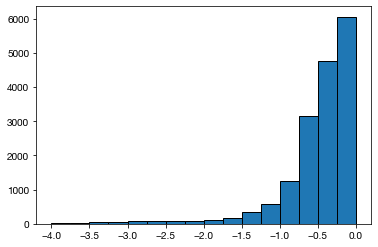

In [38]:
plt.hist(BTD_wv_ma[BTD_wv_ma<0], edgecolor='k', bins=np.arange(-4, 0.25, 0.25))

In [35]:
len(BTD_wv_ma.compressed())

8923